## Logistic Regression

### Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix 

### Prepare data

In [2]:
train_features = pd.read_csv('train_features.csv')
train_labels = pd.read_csv('train_labels.csv')

test_features = pd.read_csv('test_features.csv')
test_labels = pd.read_csv('test_labels.csv')

Survived = ['Not survived','Survived']

### Train model

#### Optimize the Logistic Regression Model

In [3]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

lr = LogisticRegression()
parameters = { 
    'C': [0.01, 0.1, 1, 10, 100]
}
cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)
best_lr=cv.best_estimator_

C:\Users\ykan0018\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ykan0018\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

BEST PARAMS: {'C': 10}

0.761 (+/-0.059) for {'C': 0.01}
0.829 (+/-0.049) for {'C': 0.1}
0.824 (+/-0.036) for {'C': 1}
0.829 (+/-0.032) for {'C': 10}
0.822 (+/-0.027) for {'C': 100}


C:\Users\ykan0018\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ykan0018\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

### Test Model

#### Visualize the Confusion Matrix

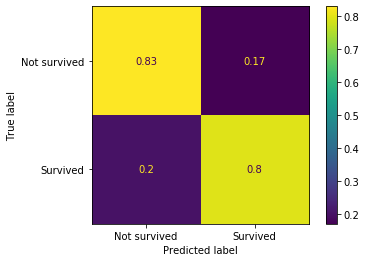

In [4]:
plot_confusion_matrix(
    best_lr, test_features, test_labels,
    display_labels=Survived,
    normalize='true')

#### Caluate the accuracy of the test data

In [5]:
print(
    'Accuracy on testing data: ' 
    + str("{:.2%}".format(best_lr.score(test_features, test_labels))))

Accuracy on testing data: 81.56%
